In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset.
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [4]:
df.head(5)

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
# Renaming the column names.
Column_names = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 
                'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 
                'Property_Area', 'Loan_Status']

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv', names=Column_names)

In [8]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis

In [10]:
# Checking the dimensions of the dataset.
df.shape

(614, 13)

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can clearly see that null values are present. Since less values are missing, lets use mean and median to replace Nan values.

In [15]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
    

In [18]:
# Separating numerical and categorical columns.
# Checking for categorical columns
categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_columns.append(i)
print("Categorical Columns: ", categorical_columns)
print("\n")

Categorical Columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']




In [19]:
numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_columns.append(i)
print("Numerical Columns: ", numerical_columns)
print("\n")

Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




# Description of Dataset

In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1. No data is missing in our dataset.
2. Our data is skewed as median is less than mean and std dev.
3. Between 75% and max huge differences can be seen, outliers might be present.
4. Maximum coapplicant income is 41667 while that of applicant income is 81000.
5. While minimum coapplicant income is 0 and that of applicant is 150.

# Data Visualization

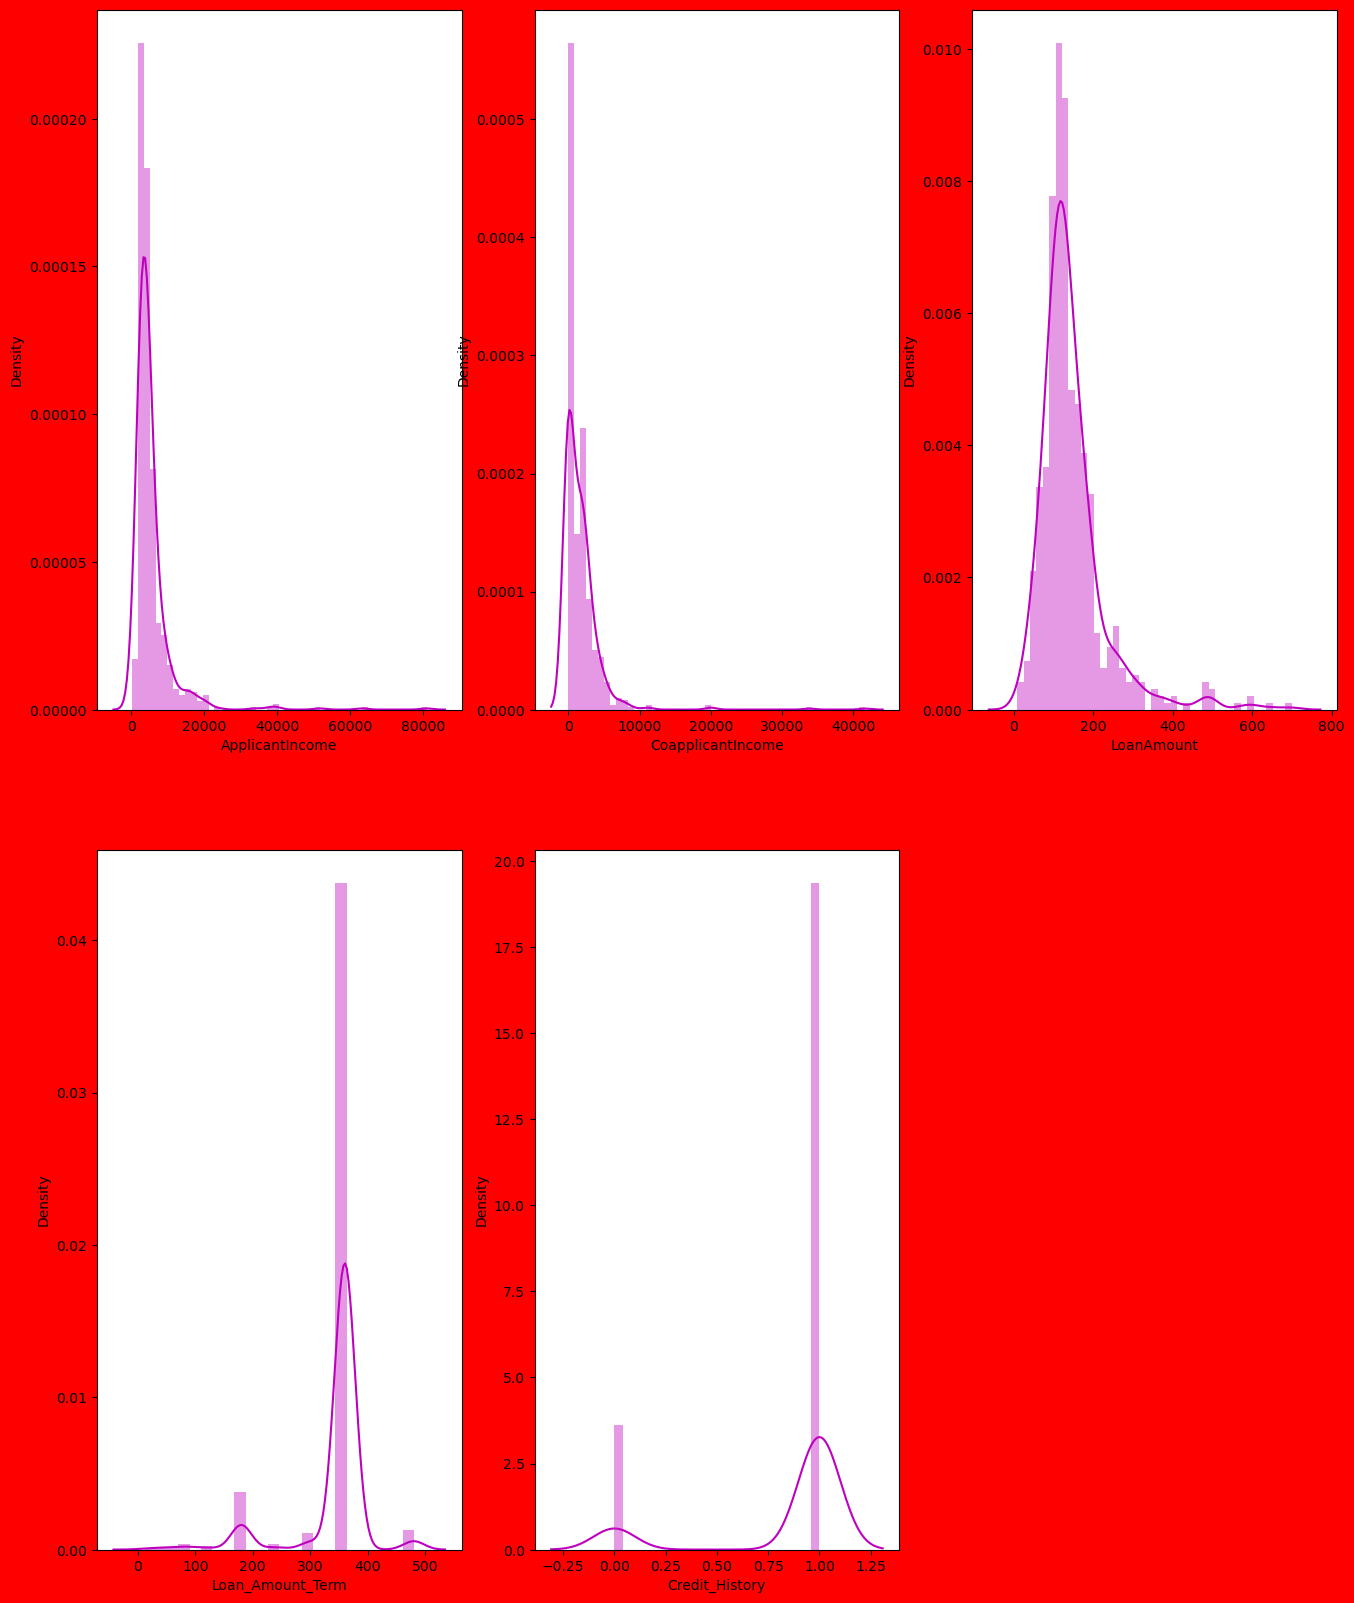

In [35]:
# Let's check how data has been distributed in remaining columns.
plt.figure(figsize = (16, 20), facecolor = 'red')
plotnumber = 1
for column in numerical_columns:
    if plotnumber <= 5:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

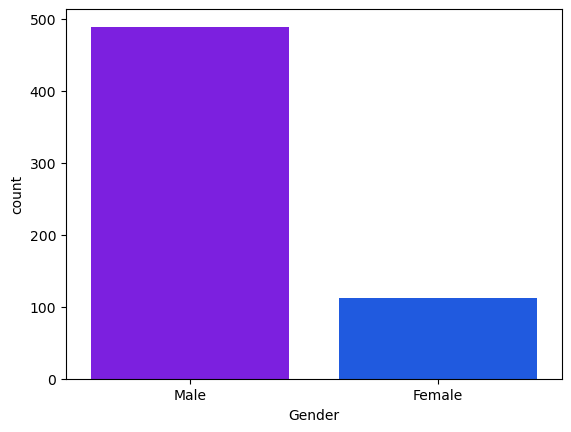

In [25]:
ax = sns.countplot(x = 'Gender', data = df)
plt.show()

Most of the loan applicants are male.

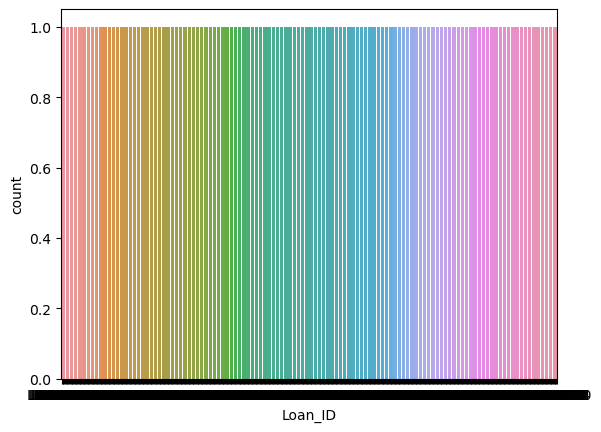

In [26]:
ax = sns.countplot(x = 'Loan_ID', data = df)
plt.show()

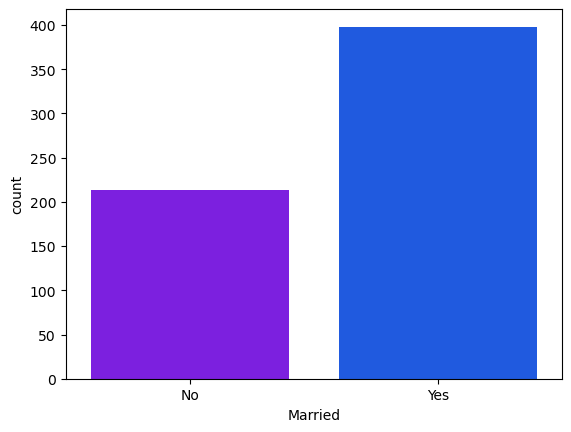

In [27]:
ax = sns.countplot(x = 'Married', data = df)
plt.show()

Most of the loan applicants are married.

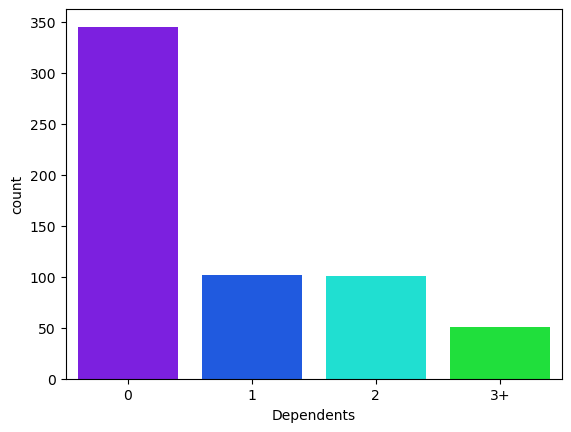

In [28]:
ax = sns.countplot(x = 'Dependents', data = df)
plt.show()

Most of the applicants have no dependents.

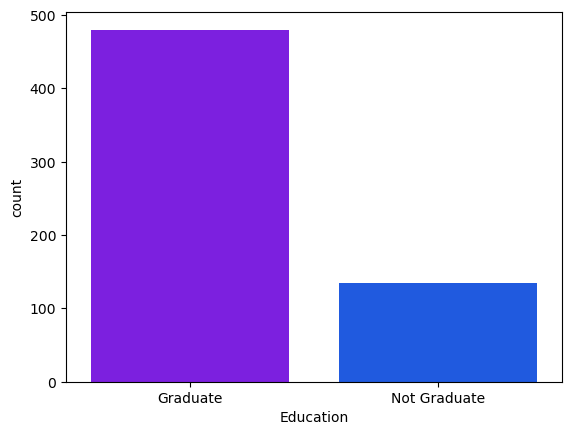

In [29]:
ax = sns.countplot(x = 'Education', data = df)
plt.show()

Most of the loan applicants are graduate, few are not.

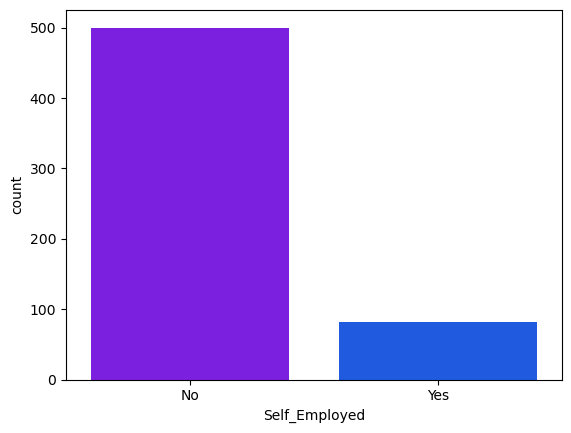

In [30]:
ax = sns.countplot(x = 'Self_Employed', data = df)
plt.show()

Most of the loan applicants are not self-employed.Very few are self-employed.

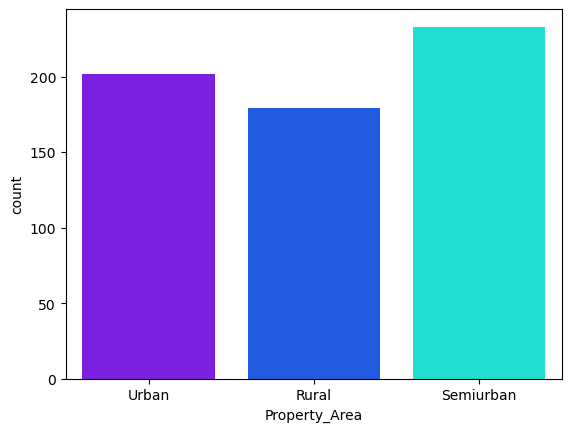

In [31]:
ax = sns.countplot(x = 'Property_Area', data = df)
plt.show()

Most of the applicants came from Semiurban followed by Urban and then rural areas.

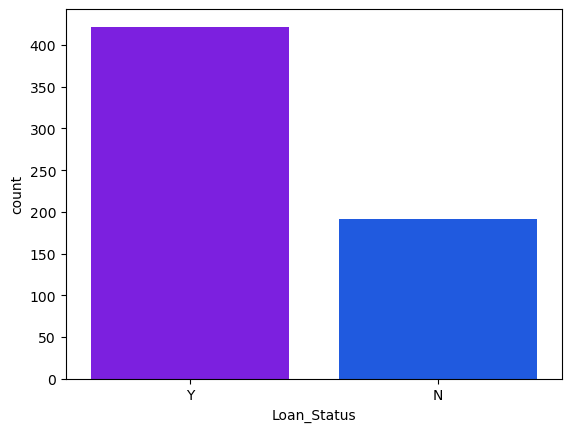

In [32]:
ax = sns.countplot(x = 'Loan_Status', data = df)
plt.show()

Most of the time loan was approved.

Now, we will impute categorical columns with mode and with mean or median in numerical columns.

In [37]:
print("Mean of Loan_Amount:",df['LoanAmount'].mean())
print("Median of Loan_Amount:",df['LoanAmount'].median())

Mean of Loan_Amount: 146.41216216216216
Median of Loan_Amount: 128.0


Since many outliers are present which makes it more sensitive, we will proceed with median.

In [38]:
# Imputating Missing value with mode for categorical features
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [39]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [40]:
# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [41]:
 df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

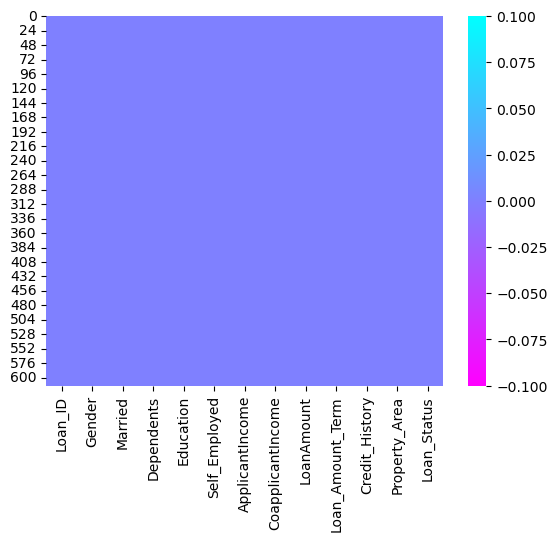

In [42]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

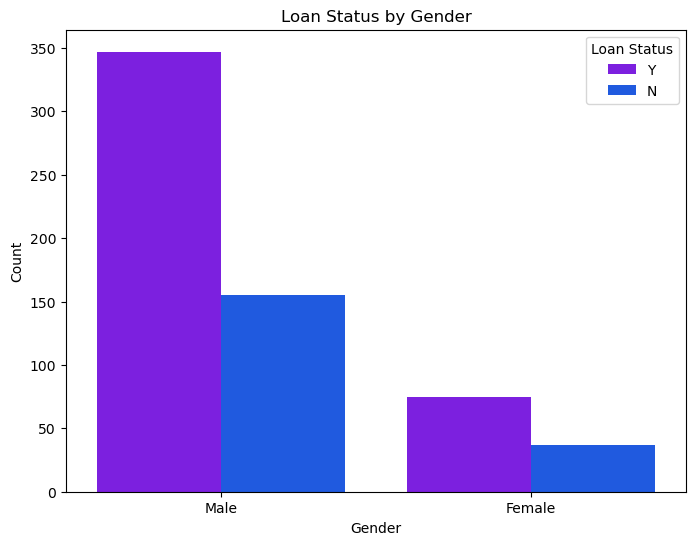

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

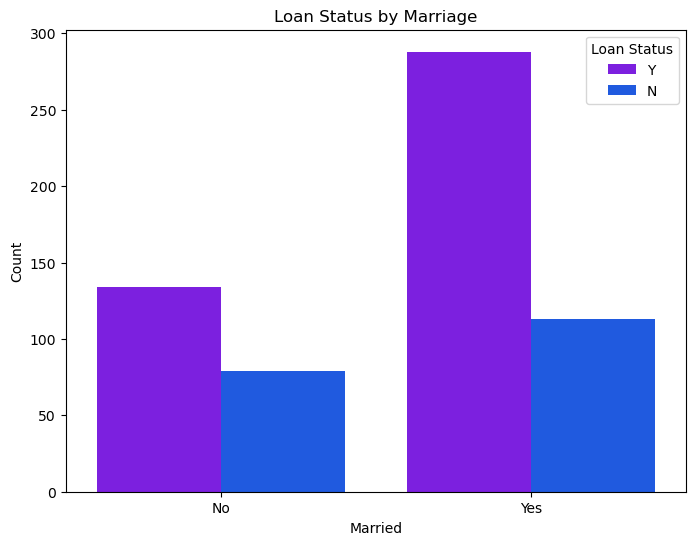

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Marriage')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

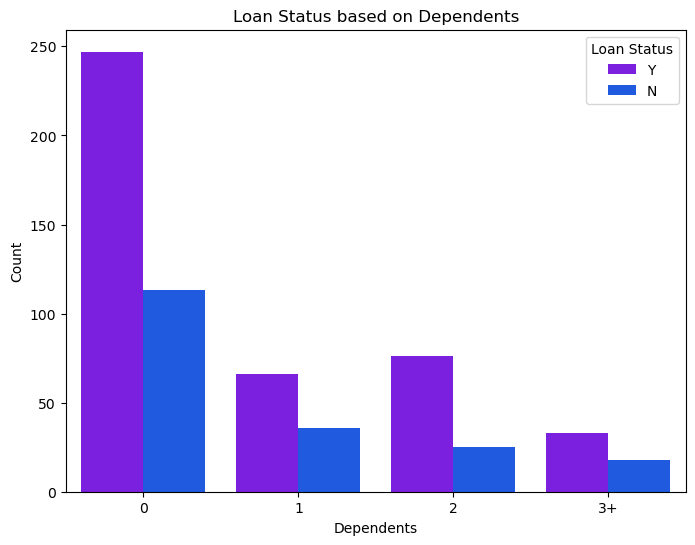

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.title('Loan Status based on Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [48]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

Here we can see that most of the applicants have no dependent and also females having no dependent have more chances to get loan approval.

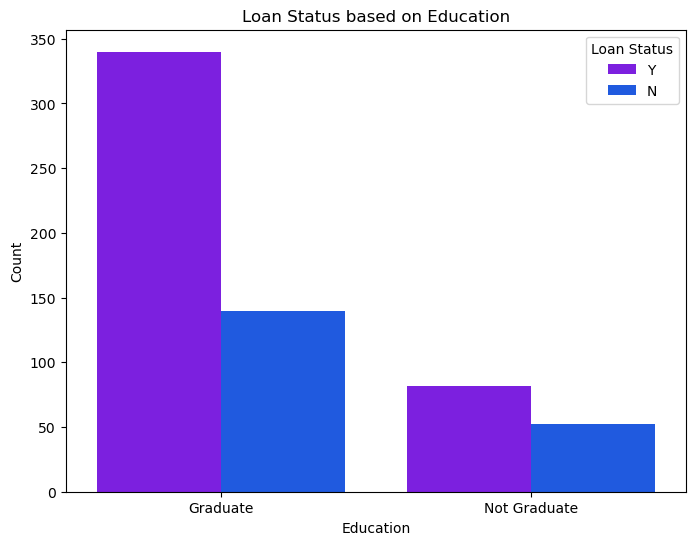

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status based on Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

We can see that Graduate applicants are more likely to get loan approval. 

# Encoding Categorical Data

In [49]:
Categories=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [50]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categories:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Outliers Detection and Removal

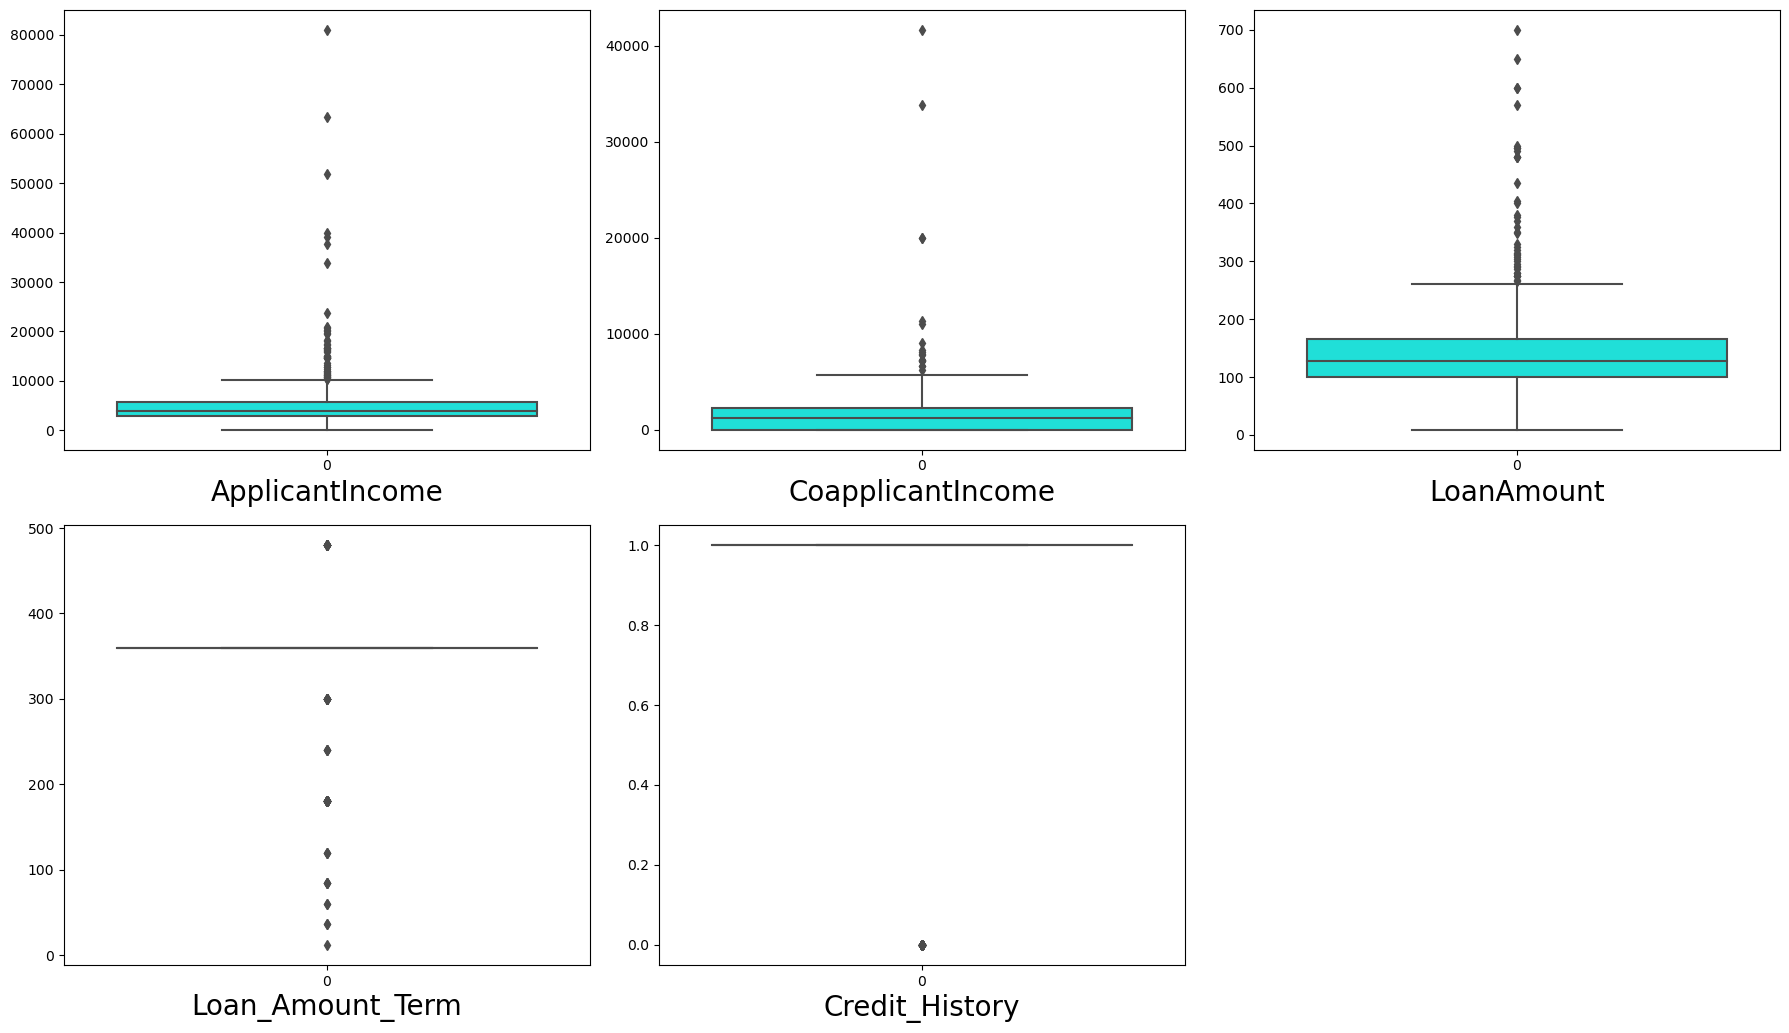

In [51]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### We know that loan_ID has not much influence on the outcome lets remove it.

In [54]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [55]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [56]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3

In [58]:
df=df[(z<3).all(axis = 1)]
df.shape

(577, 12)

In [59]:
# Lets calculate percentage data loss.
((614-577)/614)*100

6.026058631921824

Since, percentage data loss is nearly 6% which is acceptable, lets proceed further now. 

In [60]:
df.skew()   # Checking Skewness

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Since our skewness value has all positive, negative and zero values, lets use yeo-johnson power transformation method.

In [61]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
df[skew] = scaler.fit_transform(df[skew].values)

In [63]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### For numerical values the skewness is within acceptable limit, lets proceed further.

# Correlation between Independent variable and target variable. 

In [64]:
cor=df.corr()

<Axes: >

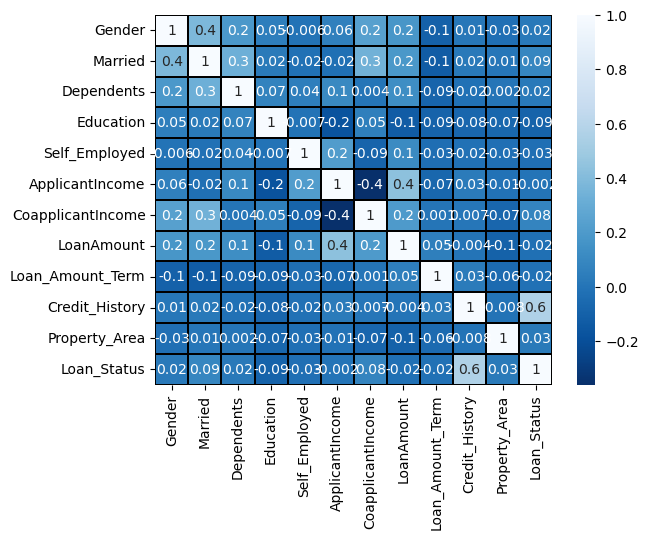

In [65]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

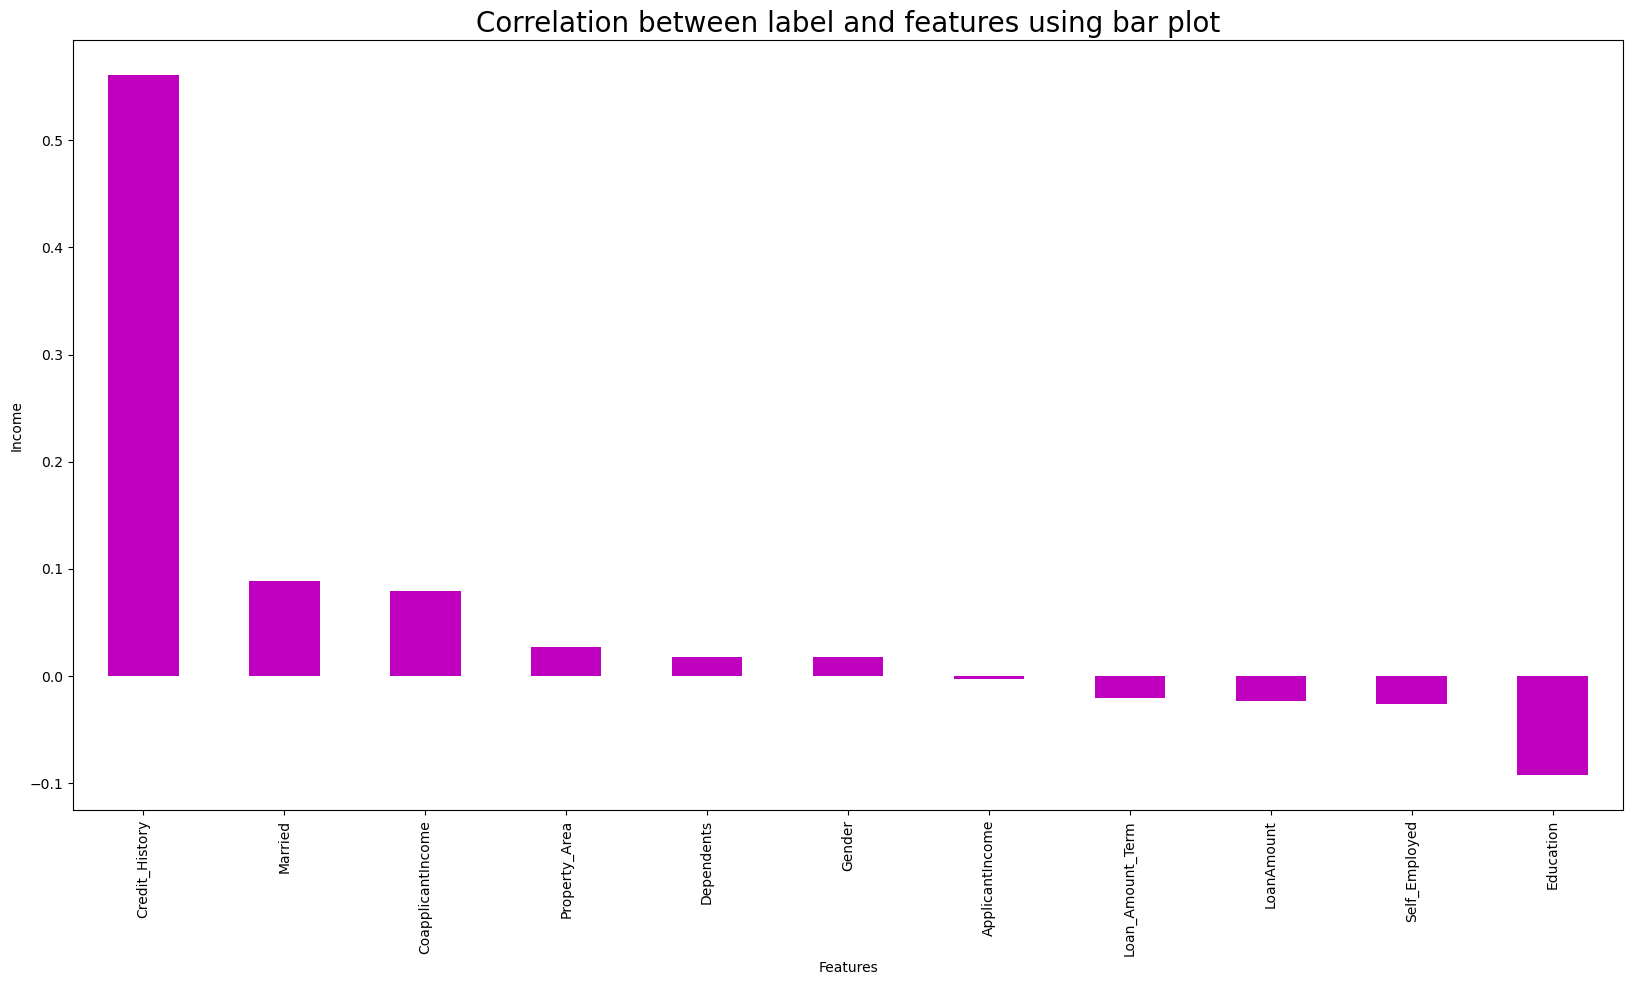

In [68]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'm')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

Credit history is highly correlated as compared to other features.

# Feature scaling and Standardization

### Checking Variance Inflation Factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif

,VIF values,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


Since nearly all values are in the limit that is less than 10, we can proceed further.

In [72]:
# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

## Balancing the target feature 

### Using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
# Oversampling using SMOTE Techniques
SM = SMOTE()
X, Y = SM.fit_resample(x, y)

In [75]:
y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [76]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

Now that we have resolved our imbalancing issue, lets use standard scalar just to ensure that our data is not biased.

## Using Standard Scalar

In [77]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Model Building

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (597, 11)
Training target size: (597,)
Test feature size: (199, 11)
Test target size: (199,)


### Finding best random state

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8140703517587939 on Random_state 10


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=10, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy: 0.8140703517587939
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.76        90
           1       0.77      0.94      0.85       109

    accuracy                           0.81       199
   macro avg       0.83      0.80      0.81       199
weighted avg       0.83      0.81      0.81       199



In [83]:
model=[ 
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy:', accuracy)

    print('Classification Report:')
    print(classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy: 0.7989949748743719
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        90
           1       0.77      0.90      0.83       109

    accuracy                           0.80       199
   macro avg       0.81      0.79      0.79       199
weighted avg       0.81      0.80      0.80       199

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy: 0.8341708542713567
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        90
           1       0.87      0.82      0.84       109

    accuracy                           0.83       199
   macro avg       0.83      0.84      0.83       199
weighted avg       0.84      0.83      0.83       199

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy: 0.8492462311557789
Clas

## Cross Validation Score

In [84]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print('\n')
    print('============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70625    0.72327044 0.74213836 0.78616352 0.74842767]
Mean Score : 0.74125




Cross Validation Score SVC() :

Score : [0.69375    0.71698113 0.80503145 0.79245283 0.76100629]
Mean Score : 0.7538443396226415




Cross Validation Score DecisionTreeClassifier() :

Score : [0.75       0.77358491 0.75471698 0.78616352 0.77987421]
Mean Score : 0.7688679245283019




Cross Validation Score RandomForestClassifier() :

Score : [0.7625     0.79245283 0.88050314 0.86163522 0.88050314]
Mean Score : 0.8355188679245285




Cross Validation Score ExtraTreesClassifier() :

Score : [0.76875    0.79874214 0.85534591 0.86163522 0.8427673 ]
Mean Score : 0.8254481132075473




We can clearly see that both the Accuracy and f1 score of Random forest classifier is best as compared to other models. Also, the cross validation score of this model is much more as compared to other. So I will select this model as my final model and perform Hyperparameter Tuning.

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [87]:
GSCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [88]:
GSCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 60}

# Final Model

In [91]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8542713567839196


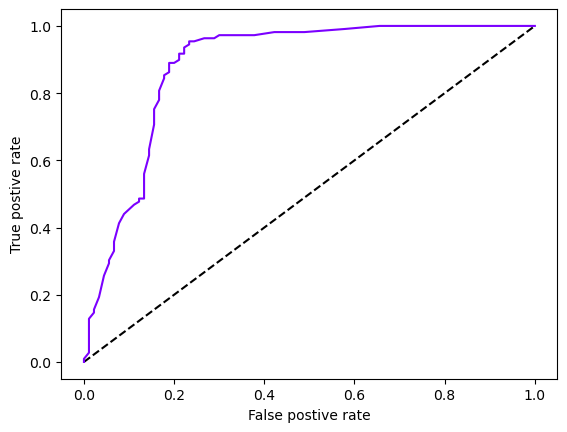

Auc Score :
 0.8505096839959225


In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [94]:
# Saving Model
import joblib
joblib.dump(Final_mod,'Loan_Status_Application_Project.pkl')

['Loan_Status_Application_Project.pkl']